## load necessary packages

In [1]:
# Package imports
import numpy as np
import copy
import matplotlib.pyplot as plt
from testCases_v2 import *
from public_tests import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets


%load_ext autoreload
%autoreload 2

In [14]:
np.random.seed(3)

In [2]:

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    #(≈ 2 lines of code)
    # A2, cache = ...
    # predictions = ...
    # YOUR CODE STARTS HERE
    A2, cache = forward_propagation(X,parameters)
    predictions = np.array([1 if x > 0.5 else 0 for x in A2[0,:]]).astype("bool")
    # YOUR CODE ENDS HERE

    return predictions.reshape(1,-1)

In [3]:
X, Y = load_planar_dataset()

In [4]:
X.shape,Y.shape

((2, 400), (1, 400))

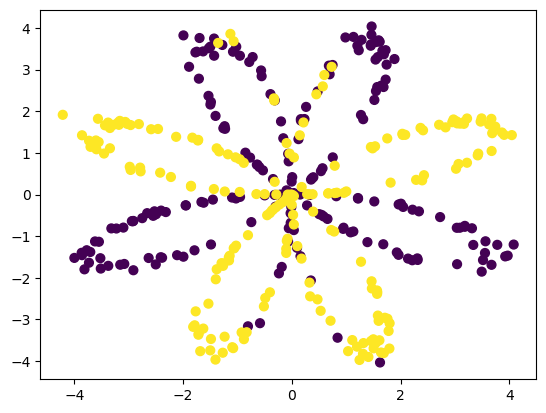

In [5]:
plt.scatter(X[0,:],X[1,:],c=Y,s=40)

## functions needed for plotting purposes 

In [6]:
def forward_propagation(X, parameters,hidden_activation='tanh'):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # YOUR CODE ENDS HERE
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    # (≈ 4 lines of code)
    # Z1 = ...
    # A1 = ...
    # Z2 = ...
    # A2 = ...
    # YOUR CODE STARTS HERE
    #print(X.shape)
    Z1 = np.matmul(W1,X) + b1
    #print(Z1.shape)
    if hidden_activation == 'tanh':
        A1 = np.tanh(Z1)
    elif hidden_activation == 'relu':
        A1 = relu(Z1)
    elif hidden_activation == 'sigmoid':
        A1 = sigmoid(Z1)
    #print(A1.shape)
    Z2 = np.matmul(W2,A1) + b2
    #print(Z2.shape)
    A2 = sigmoid(Z2)
    #print(A2.shape)
    # YOUR CODE ENDS HERE
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [7]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    #(≈ 2 lines of code)
    # A2, cache = ...
    # predictions = ...
    # YOUR CODE STARTS HERE
    A2, cache = forward_propagation(X,parameters)
    predictions = np.array([1 if x > 0.5 else 0 for x in A2[0,:]]).astype("bool")
    # YOUR CODE ENDS HERE

    return predictions.reshape(1,-1)

## import the classifier

In [8]:
from binary_classifier_NN import BinaryClassifierNN

The accuracy of a NN with hidden layer of size 1 is 67.0%
The accuracy of a NN with hidden layer of size 2 is 67.0%
The accuracy of a NN with hidden layer of size 3 is 83.0%
The accuracy of a NN with hidden layer of size 4 is 83.0%
The accuracy of a NN with hidden layer of size 5 is 82.5%
The accuracy of a NN with hidden layer of size 10 is 82.5%


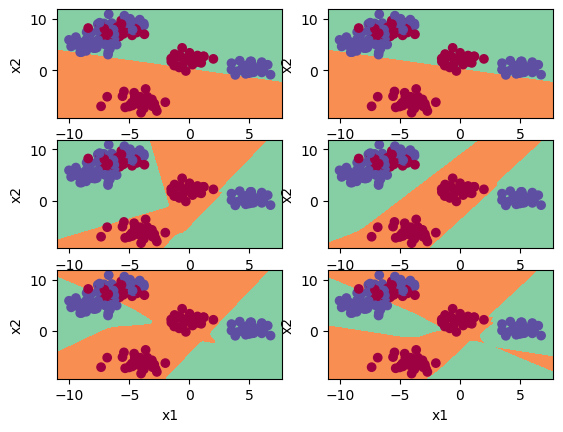

In [17]:
hidden_layers = [1,2,3,4,5,10]
for i, n_h in enumerate(hidden_layers):
    plt.subplot(3,2,i+1)
    layer_dims = [X.shape[0],n_h,Y.shape[0]]
    activations = ['tanh','sigmoid']
    clf = BinaryClassifierNN(layer_dims,activations)
    parameters, costs = clf.train(X,Y,learning_rate=1.2,num_iterations=5000,print_cost=False)
    print(f"The accuracy of a NN with hidden layer of size {n_h} is {clf.accuracy(X,Y) * 100}%")
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

## other datasets

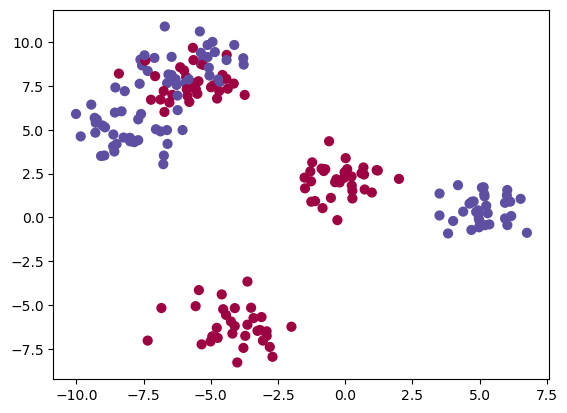

In [16]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "blobs"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);